# 1. Import library
Note: Combined from various sources, much more comprehensive than the original code provided. Import 也很讲究 XDXD

Also note: For this "Ab_Virus_01_Data_Preprocessing_v01.ipynb" Jupyter Notebook, you have to run it in the <b>"my-rdkit-env"<b> environment.

### 1.1 Import RDKit

In [1]:
from rdkit import Chem

### 1.2 Import OS and Path

In [2]:
import os
from pathlib import Path

### 1.3 Import data structures

In [3]:
import numpy as np
import pandas as pd
import multiprocessing
import logging

### 1.4 Import visualisation tools

In [4]:
import seaborn as sb
sb.set()
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Import csv file as panda df

In [5]:
df = pd.read_csv('CoV-AbDab_extract.csv')

In [6]:
df.sample(30)

,Index,AB_name,Class,Paratope,Epitope
183,184,DH1050-1,1,GYTPEFHPEDGFGVVTDW,QVNFDPFLGVYYHERSSSGWTA
195,196,WNb-2,1,TLDYYGVSCKYADTAATYYYYQCPHDGDY,YRNGGYNLYLFTKFYFPLQSGQTY
138,139,C002,1,VGFTIYHVSYNYERPSDIVVYSYTR,RKGGNYNLYLFTINGVKGFYFPLQS
257,258,P008_056,1,EVGFSYYIYSNRPYDSSNDYDISNYYDSNLETGVSGSHDS,AIHEKSNRNATVYYHKNNKSWMELMDLEGKQGNFKVTAGA
193,194,Fab1-57,1,HWAYINVFGYSSYYSTS,RKVGGNYNLTKFLQSQ
211,212,S2H97,1,GYYDNRPSGYSTSYWYDDRWSHYTYY,WRTNYPDDFKPFRSFELLHAP
264,265,Re5D06,1,QTLDYYFGVSRRNYAYPLTKYWYWPYEYDY,YRNVGGYNYLYLFITIGKGFYFLQSYGQY
174,175,Fab4-18,1,SYGHVISYDSNHDSGYNYGSLAKQYDSGVNTYPW,QCVNFTTKFLGVYYHKNERSSSGWT
33,34,H11-H4,1,RFSRSGGSAHYVSYLLSWD,RKGNYNLLFTINGVKGCYFPLQS
64,65,BD-236,1,VGITSSNYYSGGSTRLEADVIQGISSYSGQNSY,RDQTGNDYYYLFRKSNYQAGSTFNYQSYGTYGVGY


# 3. Convert FASTA sequences to Molecular and Atomic representation, and finally to one-hot vector
One-hot vector in dimension of 310 molecules X 239 atoms X 37 atomic features

In [7]:
mol_ab = []
for i in range (len(df['Paratope'])):
    mol = Chem.MolFromFASTA(df['Paratope'].loc[i])
    mol_ab.append(mol)
print(len(mol_ab))

310


In [8]:
mol_virus = []
for i in range (len(df['Epitope'])):
    mol = Chem.MolFromFASTA(df['Epitope'].loc[i])
    mol_virus.append(mol)
print(len(mol_virus))

310


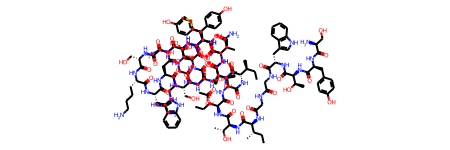

In [9]:
# Visualise a molecule:

mol = mol_ab[0]
mol

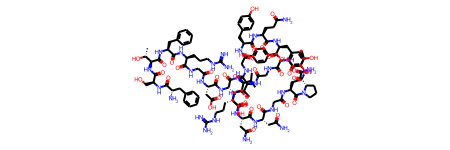

In [10]:
# Visualise a molecule:

mol = mol_virus[0]
mol

In [11]:
atoms = mol.GetAtoms()
print(len(atoms))

189


In [12]:
# Individual atom:

atom = atoms[0]
print(atom.GetSymbol(), atom.GetDegree(), atom.GetImplicitValence(), atom.GetFormalCharge(), atom.GetNumRadicalElectrons())
print(atom.GetHybridization(), atom.GetIsAromatic())
print(atom.GetTotalNumHs())

try:
    print("Chirality possible, ", atom.GetProp('_CIPCode'), atom.HasProp('_ChiralityPossible'))
except:
    print("Chirality not possible, ", atom.HasProp('_ChiralityPossible'))


N 1 2 0 0
SP3 False
2
Chirality not possible,  0


In [13]:
def mol2vec(mol): # creates features
    atoms = mol.GetAtoms()
    node_f= [atom_features(atom) for atom in atoms] # There are 179 atoms?
    return node_f

def atom_features(atom,explicit_H=False,use_chirality=False):
  # from rdkit import Chem
  
  # Convert atom.GetSynbol() into a one-hot vector (6 columns)
  # if atom.GetSymbol()=='C',       it will return [1, 0, 0, 0, 0, 0]
  # if atom.GetSymbol()=='unknown', it will return [0, 0, 0, 0, 0, 1]
  results = one_of_k_encoding_unk(atom.GetSymbol(),
    [
      'C',
      'N',
      'O',
      'S',
      'H',  # H?
      'Unknown'
    ])
  
  # Convert atom.GetDegree() into one-hot vector (11 columns)
  results += one_of_k_encoding(atom.GetDegree(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
  
  # Convert atom.GetImplicitValence() into one-hot vector (7 columns)
  results += one_of_k_encoding_unk(atom.GetImplicitValence(), [0, 1, 2, 3, 4, 5, 6])
  
  # Two columns for atom.GetFormalCharge() and atom.GetNumRadicalElectrons() (2 columns)
  results += [atom.GetFormalCharge(), atom.GetNumRadicalElectrons()]
    
  # Convert atom.GetHybridization() into one-hot vector (5 columns)
  results += one_of_k_encoding_unk(atom.GetHybridization(), \
    [Chem.rdchem.HybridizationType.SP, Chem.rdchem.HybridizationType.SP2,Chem.rdchem.HybridizationType.SP3, \
     Chem.rdchem.HybridizationType.SP3D, Chem.rdchem.HybridizationType.SP3D2])
       
  # One column for atom.GetIsAromatic() (1 column)
  results += [atom.GetIsAromatic()]
  
  # Note: default activated
  # In case of explicit hydrogen(QM8, QM9), avoid calling `GetTotalNumHs`
  # Convert atom.GetTotalNumHs() into one-hot vector (5 columns)
  if not explicit_H:  # Default activated
    results += one_of_k_encoding_unk(atom.GetTotalNumHs(), [0, 1, 2, 3, 4]) # 5 columns
  
  # Note: default not activated
  # Convert atom.GetProp('_CIPCode') and atom.HasProp('_ChiralityPossible') into one-hot vector (3 columns)
  if use_chirality: # Default not activated
    try:
      results += one_of_k_encoding_unk(atom.GetProp('_CIPCode'),['R', 'S']) + [atom.HasProp('_ChiralityPossible')] # 3 columns
    except:
      results += [False, False] + [atom.HasProp('_ChiralityPossible')] # 3 columns

  return np.array(results) 


# Convert to a one-hot vector [0, 0, ..., 0, 1, 0, ..., 0, 0]
# where 0 denotes it is not true for a feature, 1 denotes it is true for a feature

def one_of_k_encoding_unk(x, allowable_set): # Unknown is allowed
  """Maps inputs not in the allowable set to the last element."""
  if x not in allowable_set:
    x = allowable_set[-1]
  return list(map(lambda s: x == s, allowable_set))

def one_of_k_encoding(x, allowable_set): # Unknown is not allowed
  if x not in allowable_set:
    raise Exception("input {0} not in allowable set{1}:".format(
        x, allowable_set))
  return list(map(lambda s: x == s, allowable_set))

In [14]:
ab_feature = []
for i in range (len(mol_ab)):
    try:
        ab = mol2vec(mol_ab[i])
        # print(ab)
        for i in range(len(ab)):
            if ((ab[i][29]==1)): # if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3D
                print(i)
        ab = np.asarray(ab)
        ab_feature.append(ab)
    except:
        print("Molecule index " + str(i) + " cannot be converted using mol2vec function")
ab_feature = np.asarray(ab_feature)

Molecule index 20 cannot be converted using mol2vec function
Molecule index 28 cannot be converted using mol2vec function
Molecule index 52 cannot be converted using mol2vec function


C:\Users\chanj\AppData\Local\Temp\ipykernel_12436\469569340.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ab_feature = np.asarray(ab_feature)


Notice that shape is not consistent across all molecules due to the varying number of atoms for each molecule, but the dimension of the one-hot vector is consistent, since it is defined by the atom_features function above.

In [15]:
print(ab_feature.shape[0])
print(ab_feature[0].shape)
print(ab_feature[306].shape)

307
(239, 37)
(234, 37)


In [16]:
print(ab_feature)

[array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]]) array([[0, 1, 0, ..., 1, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         ...,
                                         [1, 0, 0, ..., 0, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         [0, 0, 1, ..., 0, 0, 0]])
 array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [0, 0, 1, ..., 0, 0, 0]]) array([[0, 1, 0, ..., 1, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
   

Notice that shape is not consistent across all molecules due to the varying number of atoms for each molecule, but the dimension of the one-hot vector is consistent, since it is defined by the atom_features function above.

In [17]:
virus_feature = []
for i in range (len(mol_virus)):
    try:
        if i in [20, 28, 52]:
            print("Molecule index " + str(i) + " has been removed")
        else:
            ab = mol2vec(mol_virus[i])
            for i in range(len(ab)):
                if ((ab[i][29]==1)):
                    print(i)
            ab = np.asarray(ab)
            virus_feature.append(ab)
    except:
        print("Molecule index " + str(i) + " cannot be converted using mol2vec function")
virus_feature = np.asarray(virus_feature)

Molecule index 20 has been removed
Molecule index 28 has been removed
Molecule index 52 has been removed


C:\Users\chanj\AppData\Local\Temp\ipykernel_12436\2540328286.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  virus_feature = np.asarray(virus_feature)


In [18]:
print(virus_feature.shape[0])
print(virus_feature[0].shape)
print(virus_feature[306].shape)

307
(189, 37)
(264, 37)


In [19]:
print(virus_feature)

[array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]]) array([[0, 1, 0, ..., 1, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         ...,
                                         [0, 0, 1, ..., 0, 0, 0],
                                         [0, 1, 0, ..., 1, 0, 0],
                                         [0, 0, 1, ..., 0, 0, 0]])
 array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]]) array([[0, 1, 0, ..., 1, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
   

# 4. Represent molecules in adjacency matrix and distance matrix

### 4.1 Adjacency matrix
Note that the dimension of the molecule's adjacency matrix is not the same for all molecules. But it must be a square matrix.

In [20]:
adj_matrix = Chem.rdmolops.GetAdjacencyMatrix(mol_ab[0]) # Returns the molecule’s adjacency matrix.
print(adj_matrix.shape)
adj_matrix

(239, 239)


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [21]:
adj_matrix = Chem.rdmolops.GetAdjacencyMatrix(mol_ab[306]) # Returns the molecule’s adjacency matrix.
print(adj_matrix.shape)
adj_matrix

(211, 211)


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

### 4.2 Distance matrix

In [22]:
distance_matrix = Chem.rdmolops.GetDistanceMatrix(mol_ab[0]) # Returns the molecule’s topological distance matrix.
print(distance_matrix.shape)
distance_matrix

(239, 239)


array([[ 0.,  1.,  2., ..., 93., 94., 90.],
       [ 1.,  0.,  1., ..., 92., 93., 89.],
       [ 2.,  1.,  0., ..., 91., 92., 88.],
       ...,
       [93., 92., 91., ...,  0.,  1.,  7.],
       [94., 93., 92., ...,  1.,  0.,  8.],
       [90., 89., 88., ...,  7.,  8.,  0.]])

### 4.3 3-D distance matrix
Looks like RDKit library doesn't allow this operation...

In [23]:
distance_matrix_3D = Chem.rdmolops.Get3DDistanceMatrix(mol_ab[0]) # Returns the molecule’s 3D distance matrix.
print(distance_matrix_3D.shape)
distance_matrix_3D

ValueError: Bad Conformer Id

### 4.4 Generate the adjacency matrix
Note that np.eye means an idendity matrix I

In [24]:
ab_adj = []
for i in range(len(mol_ab)):
    try:
        p1 = [Chem.rdmolops.GetAdjacencyMatrix(mol_ab[i])+np.eye(Chem.rdmolops.GetAdjacencyMatrix(mol_ab[i]).shape[0])] # Adjacency matrix + I
        p1 = np.asarray(p1)
        p1 = p1.reshape(p1.shape[1], p1.shape[2])
        ab_adj.append(p1)
    except:
        print("Molecule index " + str(i) + " cannot be converted using Chem.rdmolops.GetAdjacencyMatrix function")
ab_adj = np.asarray(ab_adj)

Molecule index 20 cannot be converted using Chem.rdmolops.GetAdjacencyMatrix function
Molecule index 28 cannot be converted using Chem.rdmolops.GetAdjacencyMatrix function
Molecule index 52 cannot be converted using Chem.rdmolops.GetAdjacencyMatrix function


C:\Users\chanj\AppData\Local\Temp\ipykernel_12436\2445059552.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ab_adj = np.asarray(ab_adj)


In [25]:
print(ab_adj.shape)
print(ab_adj[0].shape)
print(ab_adj[306].shape)

(307,)
(239, 239)
(234, 234)


In [26]:
virus_adj = []
for i in range(len(mol_virus)):
    try:
        if i in [20, 28, 52]:
                print("Molecule index " + str(i) + " has been removed")
        else:
            p2 = [Chem.rdmolops.GetAdjacencyMatrix(mol_virus[i])+np.eye(Chem.rdmolops.GetAdjacencyMatrix(mol_virus[i]).shape[0])] # Adjacency matrix + I
            p2 = np.asarray(p2)
            p2 = p2.reshape(p2.shape[1], p2.shape[2])
            virus_adj.append(p2)
    except:
        print("Molecule index " + str(i) + " cannot be converted using Chem.rdmolops.GetAdjacencyMatrix function")
virus_adj = np.asarray(virus_adj)

Molecule index 20 has been removed
Molecule index 28 has been removed
Molecule index 52 has been removed


C:\Users\chanj\AppData\Local\Temp\ipykernel_12436\4261656745.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  virus_adj = np.asarray(virus_adj)


In [27]:
print(virus_adj.shape)
print(virus_adj[0].shape)
print(virus_adj[306].shape)

(307,)
(189, 189)
(264, 264)


# 5. Matrix multiplication
For each molecule: [ adjacency matrix ] X [ feature matrix ]

In [28]:
matmul_ab = []
for i in range (ab_adj.shape[0]):
    matmul_temp = np.matmul(ab_adj[i],ab_feature[i]) # adjacency x feature
    matmul_ab.append(matmul_temp)
matmul_ab = np.asarray(matmul_ab)

C:\Users\chanj\AppData\Local\Temp\ipykernel_12436\3835778329.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  matmul_ab = np.asarray(matmul_ab)


In [29]:
print(matmul_ab.shape)
print(matmul_ab[0].shape)
print(matmul_ab[306].shape)

(307,)
(239, 37)
(234, 37)


In [30]:
matmul_virus = []
for i in range (virus_adj.shape[0]):
    matmul_temp = np.matmul(virus_adj[i],virus_feature[i]) # adjacency x feature
    matmul_virus.append(matmul_temp)
matmul_virus = np.asarray(matmul_virus)

C:\Users\chanj\AppData\Local\Temp\ipykernel_12436\1400397877.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  matmul_virus = np.asarray(matmul_virus)


In [30]:
print(matmul_virus.shape)
print(matmul_virus[0].shape)
print(matmul_virus[306].shape)

(307,)
(189, 37)
(264, 37)


# 6. Mean pooling and Max pooling

### 6.1 Mean pooling over all atoms of a particular molecule
It is a mean over all atoms of a particular molecule

In [31]:
mean_test = np.mean(matmul_ab[0], axis=0)
print(mean_test.shape)
print(mean_test)

(37,)
[2.17573222 0.45188285 0.41004184 0.0125523  0.         0.
 0.         0.58577406 1.09205021 1.37238494 0.         0.
 0.         0.         0.         0.         0.         1.13389121
 1.34728033 0.44351464 0.12552301 0.         0.         0.
 0.         0.         0.         1.86610879 1.18410042 0.
 0.         0.50209205 1.10878661 1.37238494 0.44351464 0.12552301
 0.        ]


### 6.2 Apply mean pooling to antibody and virus
For each molecule, 1) pool a mean over all atoms of a particular molecule; 2) retain the 37 feature points one-hot vector embedding layer

In [32]:
mean_ab = []
for i in range (matmul_ab.shape[0]):
    mean1 = np.mean(matmul_ab[i],axis=0).reshape(37) # pooling
    mean_ab.append(mean1)
mean_ab = np.asarray(mean_ab)

In [33]:
print(mean_ab.shape)

(307, 37)


In [34]:
mean_virus = []
for i in range (matmul_virus.shape[0]):
    mean2 = np.mean(matmul_virus[i],axis=0).reshape(37) # pooling
    mean_virus.append(mean2)
mean_virus = np.asarray(mean_virus)

In [35]:
print(mean_virus.shape)

(307, 37)


### 6.3 Max pooling over all atoms of a particular molecule
Pick the maximum number over all atoms of a particular molecule

In [36]:
max_test = np.max(matmul_ab[0], axis=0)
print(max_test.shape)
print(max_test)

(37,)
[4. 3. 2. 1. 0. 0. 0. 2. 3. 3. 0. 0. 0. 0. 0. 0. 0. 3. 3. 3. 2. 0. 0. 0.
 0. 0. 0. 4. 4. 0. 0. 4. 3. 3. 3. 2. 0.]


### 6.4 Apply max pooling to antibody and virus
For each molecule, 1) pool a max over all atoms of a particular molecule; 2) retain the 37 feature points one-hot vector embedding layer

In [37]:
max_ab = []
for i in range (matmul_ab.shape[0]):
    max1 = np.max(matmul_ab[i],axis=0).reshape(37) # pooling
    max_ab.append(mean1)
max_ab = np.asarray(max_ab)

In [38]:
print(max_ab.shape)

(307, 37)


In [39]:
max_virus = []
for i in range (matmul_virus.shape[0]):
    max2 = np.max(matmul_virus[i],axis=0).reshape(37) # pooling
    max_virus.append(max2)
max_virus = np.asarray(max_virus)

In [40]:
print(max_virus.shape)

(307, 37)


# 7 Concatenating matrices and generating final output

### 7.1 Concatenating mean_ab and mean_virus matrices, max_ab and max_virus matrices
First, we concatenate the mean_ab (307 X 37) matrix with the mean_virus (307 X 37) matrix, along axis 1 (columns). This will create a (307 X 74) resultant matrix.

Then, we concatenate the max_ab (307 X 37) matrix with the max_virus (307 X 37) matrix, along axis 1 (columns). This will create a (307 X 74) resultant matrix.

### 7.1.1 Concatenating mean_ab and mean_virus matrices
We concatenate the mean_ab (307 X 37) matrix with the mean_virus (307 X 37) matrix, along axis 1 (columns). 

In [41]:
mean_final_concatenate = np.concatenate((mean_ab, mean_virus), axis = 1)
print(mean_final_concatenate.shape)

(307, 74)


### 7.1.2 Concatenating max_ab and max_virus matrices
We concatenate the max_ab (307 X 37) matrix with the max_virus (307 X 37) matrix, along axis 1 (columns). 

In [42]:
max_final_concatenate = np.concatenate((max_ab, max_virus), axis = 1)
print(max_final_concatenate.shape)

(307, 74)


### 7.2 Saving as npy file

### 7.2.1 Defining X matrix

In [43]:
X1 = mean_final_concatenate
X2 = max_final_concatenate

### 7.2.2 Defining Y matrix

In [44]:
Y = df[~df['Index'].isin(np.array([20, 28, 52])+1)]['Class'].values

print(Y.shape)
print(Y)

(307,)
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1]


### 7.2.3 Finding path

In [45]:
CURRENT_PATH = os.getcwd()
print(CURRENT_PATH)

c:\Users\chanj\Dropbox\NTU_studies\2021_22_Year_2\URECA\Reading\PotentialAB


### 7.2.4 Defining file names

In [46]:
X1_file_name = os.path.join(CURRENT_PATH, "CoV_AbDab_mean_X.npy")
print(X1_file_name)
X2_file_name = os.path.join(CURRENT_PATH, "CoV_AbDab_max_X.npy")
print(X2_file_name)
Y_file_name = os.path.join(CURRENT_PATH, "CoV_AbDab_class_Y.npy")
print(Y_file_name)

c:\Users\chanj\Dropbox\NTU_studies\2021_22_Year_2\URECA\Reading\PotentialAB\CoV_AbDab_mean_X.npy
c:\Users\chanj\Dropbox\NTU_studies\2021_22_Year_2\URECA\Reading\PotentialAB\CoV_AbDab_max_X.npy
c:\Users\chanj\Dropbox\NTU_studies\2021_22_Year_2\URECA\Reading\PotentialAB\CoV_AbDab_class_Y.npy


### 7.3 Saving as npy file

In [47]:
np.save(X1_file_name, X1)
print("Save file 'CoV_AbDab_mean_X.npy' into directory.")
np.save(X2_file_name, X2)
print("Save file 'CoV_AbDab_max_X.npy' into directory.")
np.save(Y_file_name, Y)
print("Save file 'CoV_AbDab_class_Y.npy' into directory.")

Save file 'CoV_AbDab_mean_X.npy' into directory.
Save file 'CoV_AbDab_max_X.npy' into directory.
Save file 'CoV_AbDab_class_Y.npy' into directory.


### 7.4 Loading back

In [48]:
X1 = np.load(os.path.join(os.getcwd(), "CoV_AbDab_mean_X.npy"))
print("Loaded file 'CoV_AbDab_mean_X.npy")
X2 = np.load(os.path.join(os.getcwd(), "CoV_AbDab_max_X.npy"))
print("Loaded file 'CoV_AbDab_max_X.npy")
Y = np.load(os.path.join(os.getcwd(), "CoV_AbDab_class_Y.npy"))
print("Loaded file 'CoV_AbDab_class_Y.npy'")

Loaded file 'CoV_AbDab_mean_X.npy
Loaded file 'CoV_AbDab_max_X.npy
Loaded file 'CoV_AbDab_class_Y.npy'


### 7.5 Test loading back

In [49]:
print(X1.shape)
print(X2.shape)
print(Y.shape)

(307, 74)
(307, 74)
(307,)


In [50]:
print(X1)

[[2.17573222 0.45188285 0.41004184 ... 0.51851852 0.06349206 0.        ]
 [2.06849315 0.52739726 0.43835616 ... 0.49808429 0.08429119 0.        ]
 [2.18888889 0.43333333 0.43333333 ... 0.45454545 0.06060606 0.        ]
 ...
 [2.21875    0.484375   0.390625   ... 0.52280702 0.11929825 0.        ]
 [2.23966942 0.47933884 0.38016529 ... 0.48768473 0.0591133  0.        ]
 [2.20940171 0.44017094 0.41880342 ... 0.53787879 0.03787879 0.        ]]


In [51]:
print(X2)

[[2.20940171 0.44017094 0.41880342 ... 3.         2.         0.        ]
 [2.20940171 0.44017094 0.41880342 ... 3.         2.         0.        ]
 [2.20940171 0.44017094 0.41880342 ... 3.         2.         0.        ]
 ...
 [2.20940171 0.44017094 0.41880342 ... 3.         2.         0.        ]
 [2.20940171 0.44017094 0.41880342 ... 3.         2.         0.        ]
 [2.20940171 0.44017094 0.41880342 ... 3.         2.         0.        ]]


In [52]:
print(Y)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1]
